The objective of this analysis is to determine when the vegetation throughout the strip is evolving from green to bare soil. This notebook outlines the results of this analysis. Please see the README for more details on the implementation of the functions used throughout this analysis.

In [1]:
from IPython.display import Image
%matplotlib inline
from analysis import *

We begin by loading all of the scenes into memory. `product.py` contains a `Scene` class that loads the scenes into memory, along with their metadata and masks. This allows for easy access to the properties of each scene without having to exposure to the user the data-munging of handling the different file formats. Note that all scenes after the first scene are clipped down by 15 rows. See the README for more details on this operation.

In [2]:
scene_arr = load_scenes()


Loading scenes...
Loading data/20200629_015154_0f46
Loading data/20200701_035931_51_1067
-- row_clip on
Loading data/20200808_031109_0f25
-- row_clip on
Loading data/20200812_014219_0f36
-- row_clip on
Loading data/20200826_014025_1050
-- row_clip on
Loading data/20200831_024233_59_2263
-- row_clip on
Loading data/20200906_024424_51_2259
-- row_clip on


We can produce a set of images and masks for a given scene to inspect the data. It appears that the clear mask is correctly capturing pixels that are not exposued to either haze or clouds. Inspection of all of the masks revealed a similar behavior, leading to the use of the clear mask when generating a strip mask.

In [3]:
scene_arr[0].plot_images()
scene_arr[0].plot_udm2()

data/20200629_015154_0f46_scenes.png saved
data/20200629_015154_0f46_udm2.png saved


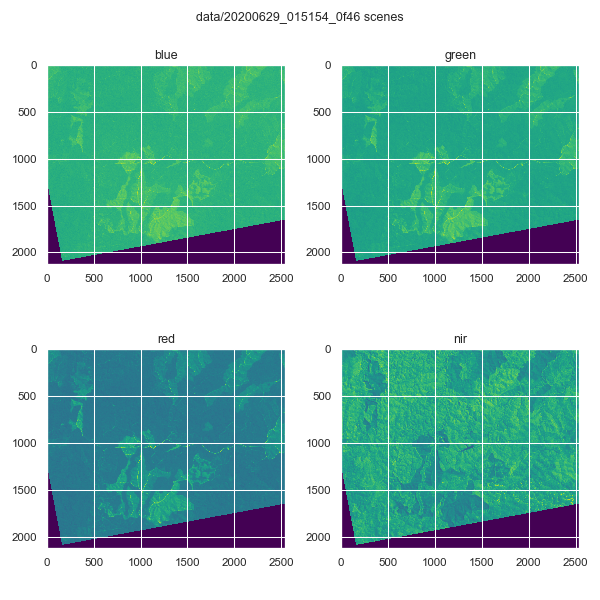

In [4]:
Image(filename='data/20200629_015154_0f46_scenes.png') 

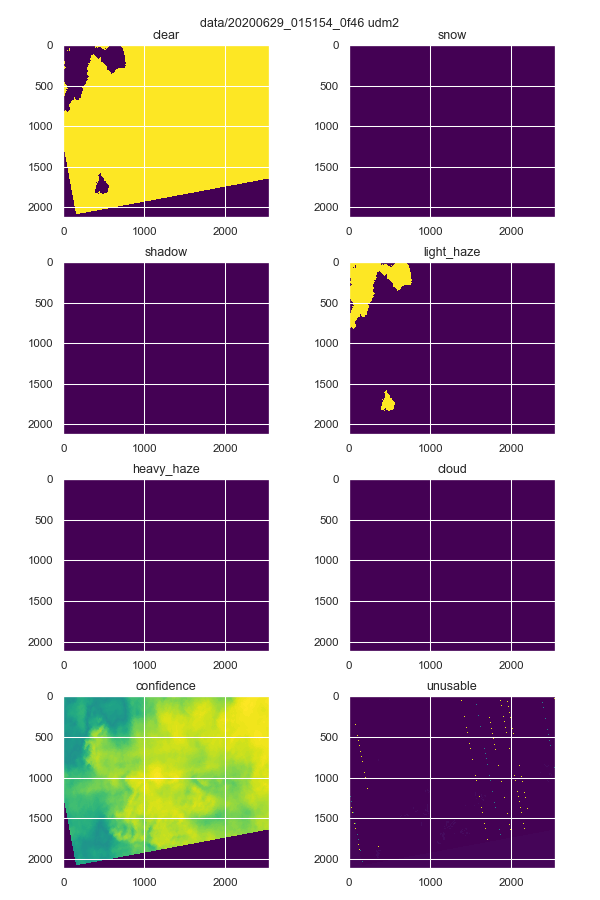

In [5]:
Image(filename='data/20200629_015154_0f46_udm2.png') 

One of the masks used in the analysis is a water mask that identifies water pixels by thresholding blue pixels above a percentile. Here we can see a couple of example water masks. While the 75th percentile mask successfully captures most of the water pixels, the 50th percentile mask captures almost all of the water pixels. While the 50th percentile mask removes some vegetative pixels from the analysis, this conservative threshold guarantees a cleaner sample for analysis.

figures/water_mask_blue75.png saved
figures/water_mask_blue50.png saved


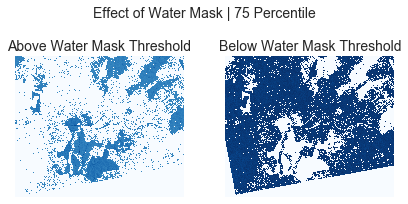

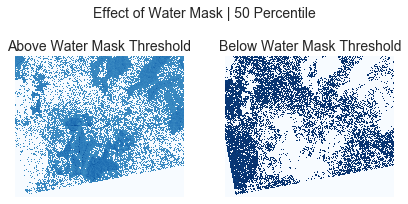

In [6]:
plot_water_mask(scene_arr, water_mask_percentile=75)
plot_water_mask(scene_arr, water_mask_percentile=50)

I used NDVI to measure the vegetative health of the region. The NDVI histogram shows the effects of the strip mask and water mask in making a more pure sample from which to measure vegetative health. The application of the mask removes a long non-Gaussian tail of lower NDVI values that are either clouds, inorganic or water.

figures/ndvi_hist_blue50.png saved


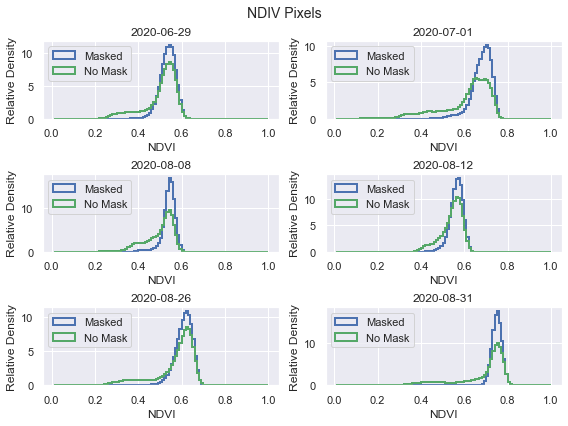

In [7]:
plot_ndvi_hist(scene_arr)

The top subplot shows the median value of the NDVI across the strip, with error bars indicating the 1-sigma uncertainty in the median value.

The NDVI trends shows less vegetation in late June, with a spike occuring only two days later in early July. This quick of a change in the NDVI is difficult to justify due to organic behevaior alone. There may be differences in viewing angles between the two scenes that cause a discrepency in the measured bands due to differences in the bidirectional reflectance distribution function. The next trend is a slower increase toward larger NDVI values (more green vegetation) throughout late August and into early September. This trend indicates that these months are where the vegetative matter is growing from bare soil into leafy matter.

The bottom subplots show the rate-of-change of the NDVI per day. The large spike at the beginning confirms that this datapoint is an outlier that should not be used to indicate real vegetative growth.

figures/ndvi_trends_blue50.png saved


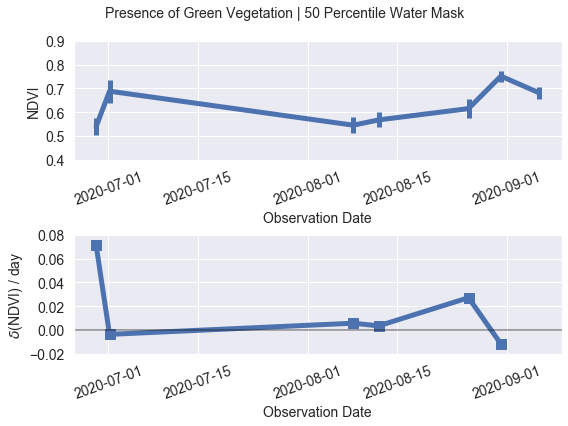

In [8]:
plot_ndvi_trends(scene_arr)

Finall we can see the effect of using the water mask on the NDVI trends. The median NDVI stays within the 1-sigma error bars of the non-masked result, but with a much smaller error bar. The water mask is successfully improving the quality of our measurement.

figures/ndvi_trends_water_mask.png saved


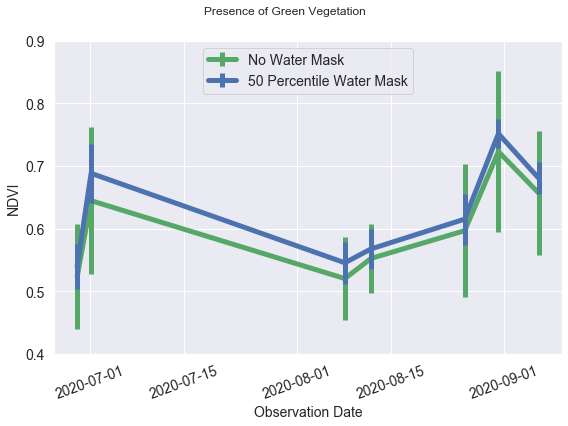

In [9]:
plot_ndvi_trends_water_mask(scene_arr)

In conlusion, this region is experiencing a growth from bare soil in early July to green vegetative matter in early September. The rate of this growth is largest in late August, with a the peek of the grwoth occuring just before September begins.